<h1>ZADANIE DOMOWE:</h1>
Adam Dołowy

$$\sigma_X^2=<x^2>-<x>^2$$
$$<p>=?$$
$$<p^2>=?$$
$$\sigma_P^2=?$$

$$\sigma_X \sigma_P \geq \frac{\hbar}{2}$$

Spradzić, czy ta zasada nieoznaczoności jest faktycznie dla tej studni potencjału spełniona.


<h1>ROZWIĄZANIE</h1>

<h3>0. Definicja zmiennych i równania z repozytorium:</h3>

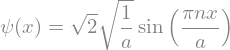

In [93]:
import sympy as sp
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
i = sp.Symbol('i', imaginary=True)
psi = sp.Function('psi')
x, k, a, h, n, psi(x), i
sp.init_printing()

psi(x).diff(x, x)
-k ** 2 * psi(x)
eq = sp.Eq(psi(x).diff(x, x), -k ** 2 * psi(x))
sp.dsolve(eq, psi(x))
sp.dsolve(eq, psi(x), ics={psi(0): 0, psi(a): 0})
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol = sol.subs(k, n * sp.pi / a)
sp.Abs(sol.rhs) ** 2
sp.integrate(sol.rhs ** 2, (x, 0, a))
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

<h3>1. Odchylenie standardowe położenia:</h3>

In [94]:
var_x = sp.integrate(sol.rhs * x * sol.rhs, (x,0,a)).simplify()
var_x

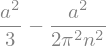

In [95]:
var_x_2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x,0,a)).simplify()
var_x_2

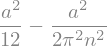

In [96]:
sigma_x_2 = (var_x_2 - var_x**2).simplify()
sigma_x_2

<h3>2. Odchylenie standardowe pędu: </h3>
$$<p>=\int \psi^{*} \hat{p}  \frac{\partial}{\partial x}  \psi \ dx$$
$$<p^2>=\int \psi^{*} \hat{p^2} \frac{\partial^2}{\partial x^2}  \psi \ dx$$
$$p= - i \hbar $$
$$p^2= (-i \hbar)^2 = -\hbar^2 $$

In [97]:
p = sp.I*h
p

In [98]:
p_2 = (-sp.I*h)**2
p_2

In [99]:
var_p = sp.integrate(sol.rhs * p * sol.rhs.diff(x), (x,0,a)).simplify()
var_p

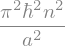

In [100]:
var_p_2 = sp.integrate(sol.rhs * p_2 * sol.rhs.diff(x,x), (x,0,a)).simplify()
var_p_2

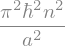

In [101]:
sigma_p_2 = var_p_2 - var_p**2
sigma_p_2.simplify()

<h3>3. Iloczyn odchyleń standardowych</h3>

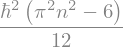

In [102]:
sigma_xp_2 = (sigma_p_2*sigma_x_2).simplify()
sigma_xp_2

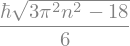

In [103]:
#sigma_xp = (h/2)*(sp.sqrt((sp.pi**2 * n**2 - 6)/3))
sigma_xp = sp.sqrt(sigma_xp_2).simplify()
sigma_xp

<h3>4. Wnioski: </h3>
Uzyskany wzór przekształcony do "przyjemniejszego" formatu:
$$\frac{\hbar}{2} * \sqrt{\frac{\Pi^2 n^2}{3} - 2} \geq \frac{\hbar}{2}$$
Skoro n >= 1, to dla n minimalnego = 1:
$$\frac{\hbar}{2} * \sqrt{\frac{\Pi^2}{3} - 2} \geq \frac{\hbar}{2}$$
Co w przybliżeniu daje:

In [104]:
expr = sigma_xp.subs(n,1)
expr.evalf()

In [105]:
expr.evalf() >= h/2

A więc ta nierówność jest w naszym przypadku zawsze spełniona, gdyż dla $$n \geq 1$$ lewa strona będzie większa od $$\frac{\hbar}{2}$$